In [1]:
# Import all necessary libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
np.random.seed(42)                          # This allows us to reproduce the results from our script
from keras.models import Sequential             
from keras.layers import Dense, Activation
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical            # help us to transform our data later

In [3]:
# Load in the MNIST Dataset & get input size
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

print('Total no of Training Images: ',X_train.shape[0]) 
print('Total no of Testing Images: ',X_test.shape[0]) 
print('Size of Images:', X_train.shape[1:], "; Dimensions is in pixels")
print('Total no of Training Labels:', y_train.shape[0])
print('Total no of Testing Labels:', y_test.shape[0])

Total no of Training Images:  60000
Total no of Testing Images:  10000
Size of Images: (28, 28) ; Dimensions is in pixels
Total no of Training Labels: 60000
Total no of Testing Labels: 10000


Label: 0


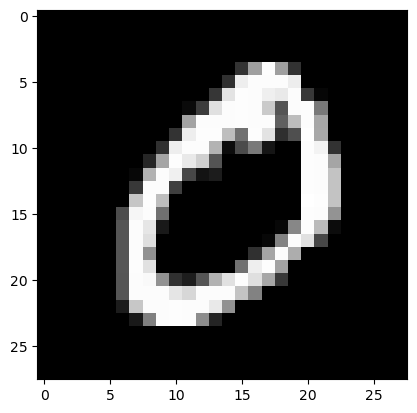

In [5]:
# Preview of input data
plt.imshow(X_train[1], cmap = plt.get_cmap('gray'))  # cmap - convert image into grayscale
print('Label:', y_train[1])

In [7]:
# Preprocess data: First the images will be reduced down into a vector of pixels
# 28 by 28 images have a total have 784 pixels, meaning 784 inputs
X_train = X_train.reshape((X_train.shape[0],-1))
X_test = X_test.reshape((X_test.shape[0], -1))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [9]:
# Preprocess data: Normalize the input data by dividing every pixel value by 255
# This ensures that all pixel values will be between 0 and 1, so some values aren't
# overvalued in comparison to others
X_train = X_train/255
X_test = X_test/255

X_train.shape # Shape is still the same

(60000, 784)

In [11]:
# Preprocess data: Use One-hot Encoding to categorize values because model will think
# higher values are more optimal, so instead the numbers will be categories and the 
# predicted number will be set to 1 to say that number is 

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape)
num_classes = y_test.shape[1]
print("Number of possible numbers is (0-9 inclusive):", num_classes)
num_pixels = 784

(60000, 10)
Number of possible numbers is (0-9 inclusive): 10


In [99]:
# Defining Model: There will be 2 hidden layers with 128 neurons(first) and 64 neurons(second)
# The hidden layers will use the relu function which basically just keeps all positive values 
# and all negative values become 0. The output layer will use softmax function which basically
# gives probabilities between 0 and 1 for the potential outcomes

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(256, input_shape=(num_pixels,), activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [101]:
# Build the model
model = baseline_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,058 (851.79 KB)

 Trainable params: 218,058 (851.79 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
# Compile model: The loss function used will be the categorical crossentropy which is good for classification tasks because
# it measures the difference between the predicted probability distribution and the true distribution, helping the model 
# to learn and improve its accuracy by penalizing incorrect predictions more heavily
# In addition, the optimizer used will be stochastic gradient descent (SGD) which works well with the softmax function

opt = SGD(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

In [125]:
# Train the model

model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 646us/step - accuracy: 0.9272 - loss: 0.2567
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step - accuracy: 0.9283 - loss: 0.2543
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 533us/step - accuracy: 0.9322 - loss: 0.2430
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 542us/step - accuracy: 0.9313 - loss: 0.2434
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 555us/step - accuracy: 0.9341 - loss: 0.2371
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - accuracy: 0.9350 - loss: 0.2287
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 565us/step - accuracy: 0.9354 - loss: 0.2279
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 573us/step - accuracy: 0.9363 - loss: 0.2249
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 573us/step - accuracy: 0.9379 - loss: 0.2241
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 564us/step - accuracy: 0.9375 - loss: 0.2171
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 525us/step - accuracy: 0.9388 - loss: 0.2128
Epoch 12

In [127]:
# Test our model
scores = model.evaluate(X_test, y_test, verbose=1)
print("Error: %.2f%%" % (100-scores[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.9315 - loss: 0.2295
Error: 5.86%


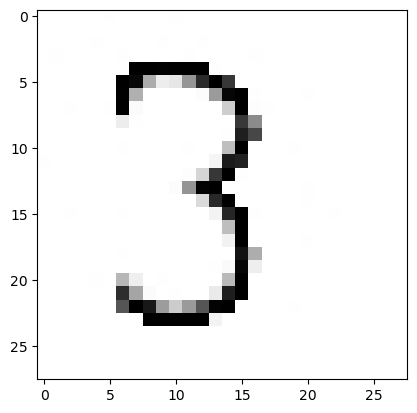

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted value is  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Probability across all numbers : 3


In [153]:
# Now lets try and pick out our own number and try to predict the digit value

img_width, img_height = 28, 28

ii = cv2.imread('./3.jpeg')
gray_image = cv2.cvtColor(ii, cv2.COLOR_BGR2GRAY)
gray_image = cv2.bitwise_not(gray_image)
# print(gray_image)
plt.imshow(gray_image, cmap='Greys')
plt.show()
# gray_image.shape
x = np.expand_dims(gray_image, axis=0)
x = x.reshape((1, -1))

preds = model.predict(x)
prob = np.argmax(preds)


print('Predicted value is ',preds[0])
print('Probability across all numbers :', prob)